In [2]:
import numpy as np
import cv2

In [3]:
#Loading haarcascade face detection model
face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [4]:
#loading functions
#This function, if detects a face, return the cropped image of the given size
#or else return the input image
def face_extractor(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray, 1.3,5)
    
    if faces is ():
        return None
    
    #Crop the found faces
    for (x,y,w,h) in faces:
        cropped_face =img[y:y+h ,x:x+w]
        
    return cropped_face

#Collect 150 samples of your face from webcam
capture = cv2.VideoCapture(0)
count=0
while True:
    ret, frame =capture.read()
    if face_extractor(frame) is not None:
        count += 1
        face = cv2.resize(face_extractor(frame),(200,200))
        face = cv2.cvtColor(face , cv2.COLOR_BGR2GRAY)
        
        #saving file in specified directory 
        file_name_path = 'C://Users//Nupur Agarwal//Desktop//face Recognition//training dataset//'+str(count)+ '.jpg'    
        cv2.imwrite(file_name_path, face)
        
        #Displaying live count with the image
        cv2.putText(face, str(count), (70,70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
        cv2.imshow('Cropped face', face)
    else:
        print('Face undetected')
        pass
    if cv2.waitKey(1) == 13 or count == 150:
        break

#To turn off the webcam
capture.release()
cv2.destroyAllWindows()
        
        

Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face undetected
Face und

In [78]:
#import the VGG model for transfer learning and fine tuning
from keras.applications import MobileNet

In [79]:
#Excluding the last layer in order to make changes to the model
model=MobileNet(weights='imagenet' , input_shape =(224,224,3), include_top =False)
for layer in model.layers:
    layer.trainable=False
    

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D 

In [82]:
#Adding a fully connected layer at the end of the model
top_model=model.output
top_model=GlobalAveragePooling2D()(top_model)
top_model=Dense(units=1024, activation='relu')(top_model)
top_model=Dense(units=612, activation='relu')(top_model)
top_model=Dense(units=20, activation='relu')(top_model)
#Here number of classes is set equals to 2
top_model=Dense(2,activation='softmax')(top_model)

In [83]:
#Combining both the old and the new model
from keras.models import Model
MODEL=Model(inputs= model.input, outputs=top_model)

In [72]:
model.layers[0].input

<tf.Tensor 'input_3:0' shape=(None, 224, 224, 3) dtype=float32>

In [73]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [84]:
#To generate more images from the dataset and loading our dataset
from keras.preprocessing.image import ImageDataGenerator

train_data ="C:\\Users\\Nupur Agarwal\\Desktop\\ml-ops'20\\face Recognition\\train set"
    
test_data = "C:\\Users\\Nupur Agarwal\\Desktop\\ml-ops'20\\face Recognition\\test set"
#Doing data augmentation
train_datagen= ImageDataGenerator(
              rescale=1./255,
              rotation_range=45,
              width_shift_range=0.3,
              height_shift_range=0.3,
              horizontal_flip=True,
              fill_mode='nearest')

test_datagen= ImageDataGenerator(rescale=1./255)

#setting of the batch size equally for both training and testing dataset
train_batch_size =16
test_batch_size=18

#Taking the data from the directory
train_generator =train_datagen.flow_from_directory(
                 train_data,
                 target_size=(224,224),
                 batch_size=train_batch_size,
                 class_mode='categorical')

validation_generator= test_datagen.flow_from_directory(
                       test_data,
                       target_size=(224,224),
                       batch_size=test_batch_size,
                       class_mode='categorical')

Found 400 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [85]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [86]:
#Training and then saving the model
checkpoint=ModelCheckpoint("Mymodel.h5",
                           monitor="val_loss",
                           mode="min",
                           save_best_only=True,
                           verbose=1)
earlystop=EarlyStopping(monitor="val_loss",
                        min_delta= 0,
                        patience=3,
                        verbose=1,
                        restore_best_weights=True)

#putting all our callbacks in a callback list 
callbacks=[earlystop,checkpoint]

#compiling the model now
MODEL.compile(loss='categorical_crossentropy',
                   optimizer = RMSprop(lr=0.001),
                   metrics = ['accuracy'])
    

#Training the epoch now with 2 epochs
epochs =2
batch_size=16

history=MODEL.fit_generator(train_generator,
                             steps_per_epoch= 1000,
                             epochs =2,
                             callbacks=callbacks,
                             validation_data=validation_generator,
                             validation_steps=300)



Epoch 1/2
1000/1000 [==============================] - 3710s 4s/step - loss: 0.1333 - accuracy: 0.9747 - val_loss: 3.1181 - val_accuracy: 0.4234

Epoch 00001: val_loss improved from inf to 3.11808, saving model to Mymodel.h5
Epoch 2/2
1000/1000 [==============================] - 3496s 3s/step - loss: 0.0416 - accuracy: 0.9919 - val_loss: 5.0502 - val_accuracy: 0.5072

Epoch 00002: val_loss did not improve from 3.11808


In [121]:
#Loading the pre-trained model for face prediction
from keras.models import load_model
model=load_model("Mymodel.h5")
from keras.preprocessing import image


In [129]:
#Import a test image for prediction
testimage= image.load_img("C://Users//Nupur Agarwal//Desktop//ml-ops'20//testimage.jpg",target_size=(224,224))

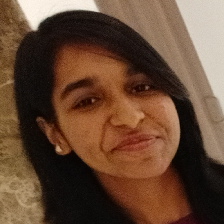

In [130]:
testimage

In [131]:
#converting imgae to 4D
import numpy as np
testimage=image.img_to_array(testimage)
testimage=np.expand_dims(testimage, axis=0)
type(testimage)

numpy.ndarray

In [132]:
print(testimage.shape)

(1, 224, 224, 3)


In [150]:
prediction=model.predict(testimage)


In [151]:
if prediction.argmax()==0:
    print("Nupur")
else:
    print("Neha")

Nupur
